In [ ]:
!pip install opencv-python mediapipe pyttsx3 SpeechRecognition pyaudio tensorflow


In [2]:
!pip install gtts


In [4]:
!pip install playsound


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=6bf2f7bb21d8f937231c073f5d3e23ea34ecd6408493e2af2ec0efc8d7fef40c
  Stored in directory: c:\users\manas\appdata\local\pip\cache\wheels\ba\39\54\c8f7ff9a88a644d3c58b4dec802d90b79a2e0fb2a6b884bf82
Successfully built playsound


In [42]:
import speech_recognition as sr
from gtts import gTTS
import os
from playsound import playsound

# Initialize recognizer class (for recognizing the speech)
recognizer = sr.Recognizer()

# Capture the microphone input
with sr.Microphone() as source:
    # Adjust for ambient noise to improve recognition in noisy environments
    recognizer.adjust_for_ambient_noise(source, duration=1)
    
    print("Please say something (a sentence):")
    # Listen to the speech
    audio_data = recognizer.listen(source)
    print("Recognizing...")

    try:
        # Recognize the speech using Google Web API (default recognizer)
        msg = recognizer.recognize_google(audio_data)
        print(f"You said: {msg}")

        # Convert recognized text to speech
        tts = gTTS(text=msg, lang='en')
        # Save the converted audio to a file
        tts.save("recognized_speech.mp3")

        # Optionally, remove the saved file after playing
        os.remove("recognized_speech.mp3")

    except sr.UnknownValueError:
        print("Sorry, I could not understand the audio")
    except sr.RequestError:
        print("Sorry, there was an issue with the request")



Please say something (a sentence):
Recognizing...
You said: hello


In [19]:
pip install pygame


     ---------------------------------------- 10.6/10.6 MB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Please say something (a sentence):
Recognizing...
You said: hello


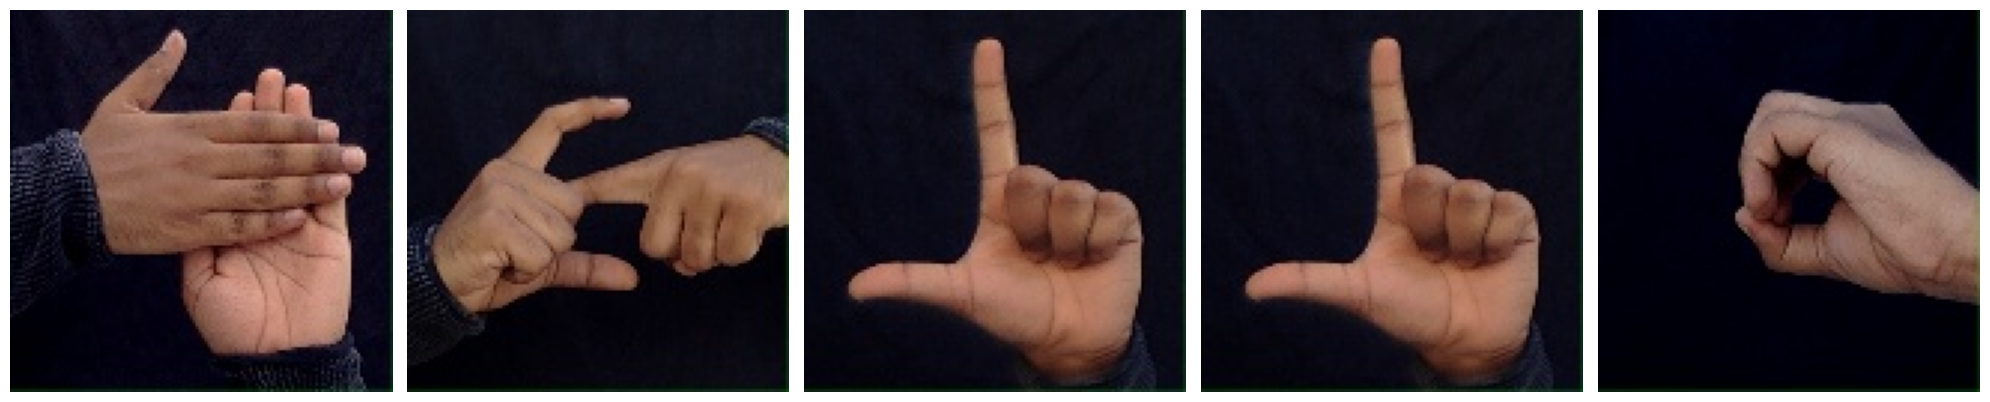

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import speech_recognition as sr
from gtts import gTTS
import pygame
import tempfile
import time

# Step 1: Specify the image path in the extracted directory
path = 'project/'  # Update to the correct path within the extracted folder

# Step 2: Initialize recognizer class (for recognizing the speech)
recognizer = sr.Recognizer()

# Capture the microphone input
with sr.Microphone() as source:
    # Adjust for ambient noise to improve recognition in noisy environments
    recognizer.adjust_for_ambient_noise(source, duration=1)
    
    print("Please say something (a sentence):")
    # Listen to the speech
    audio_data = recognizer.listen(source)
    print("Recognizing...")

    try:
        # Recognize the speech using Google Web API (default recognizer)
        recognized_msg = recognizer.recognize_google(audio_data)
        print(f"You said: {recognized_msg}")

        # Convert recognized text to uppercase
        recognized_msg = recognized_msg.upper()

        # Step 3: List to store images and spaces for the recognized text
        images = []

        # Loop through each character in the recognized message
        for i in recognized_msg:
            if i == ' ':  # For spaces, append None to represent a gap
                images.append(None)
                continue
            image_path = os.path.join(path, i, '0.jpg')  # Construct the image path for each character
            try:
                # Open the image and append it to the list
                img = Image.open(image_path)
                images.append(img)
            except FileNotFoundError:
                images.append(None)  # Append None if image is not found

        # Step 4: Create a figure with larger subplots for all images and spaces
        fig, axes = plt.subplots(1, len(images), figsize=(20, 10))  # Increase the figure size

        # Loop through each axis and corresponding image
        for ax, img in zip(axes, images):
            if img is not None:
                ax.imshow(img)  # Display the image
                ax.axis('off')  # Hide axes for images
            else:
                # When img is None, just set the axis background to white (for visual spacing)
                ax.set_facecolor('white')
                ax.axis('off')  # Hide axes for empty space

        # Adjust layout to ensure everything fits
        plt.tight_layout()
        plt.show()

        # Convert recognized text to speech
        tts = gTTS(text=recognized_msg, lang='en')

        # Save to a temporary file
        with tempfile.NamedTemporaryFile(delete=False, suffix='.mp3') as temp_audio_file:
            tts.save(temp_audio_file.name)  # Save to a temporary file
            temp_audio_file_path = temp_audio_file.name  # Get the path of the temporary file

        # Initialize pygame mixer and play the audio file
        pygame.mixer.init()
        pygame.mixer.music.load(temp_audio_file_path)
        pygame.mixer.music.play()

        # Wait for the audio to finish playing
        while pygame.mixer.music.get_busy():
            continue

        # Delay to ensure the audio playback is completely finished
        time.sleep(0.5)

        # Optionally, remove the saved file after playing
        try:
            os.remove(temp_audio_file_path)
        except PermissionError:
            pass  # If the file cannot be deleted, just skip the deletion

    except (sr.UnknownValueError, sr.RequestError):
        pass  # Do nothing if an error occurs in speech recognition


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import speech_recognition as sr
from gtts import gTTS
import pygame
import tempfile
import time

# Step 1: Specify the image path in the extracted directory
path = 'project/'  # Update to the correct path within the extracted folder

# Step 2: Initialize recognizer class (for recognizing the speech)
recognizer = sr.Recognizer()

# Function to calculate word accuracy
def calculate_word_accuracy(spoken_text, recognized_text):
    spoken_words = spoken_text.split()
    recognized_words = recognized_text.split()

    # Calculate the number of matching words
    matching_words = sum(1 for i in range(min(len(spoken_words), len(recognized_words))) if spoken_words[i] == recognized_words[i])

    # Calculate word accuracy as a percentage
    word_accuracy = (matching_words / len(spoken_words)) * 100
    return word_accuracy

# Capture the microphone input
with sr.Microphone() as source:
    # Adjust for ambient noise to improve recognition in noisy environments
    recognizer.adjust_for_ambient_noise(source, duration=1)
    
    print("Please say something (a sentence):")
    # Listen to the speech
    audio_data = recognizer.listen(source)
    print("Recognizing...")

    try:
        # Recognize the speech using Google Web API (default recognizer)
        recognized_msg = recognizer.recognize_google(audio_data)
        print(f"You said: {recognized_msg}")

        # Expected spoken text (for accuracy comparison)
        spoken_text = "good morning"  # Update this with the actual expected sentence

        # Calculate speech recognition accuracy
        accuracy = calculate_word_accuracy(spoken_text, recognized_msg)
        print(f"Speech Recognition Accuracy: {accuracy}%")

        # Convert recognized text to uppercase
        recognized_msg = recognized_msg.upper()

        # Step 3: List to store images and spaces for the recognized text
        images = []

        # Loop through each character in the recognized message
        for i in recognized_msg:
            if i == ' ':  # For spaces, append None to represent a gap
                images.append(None)
                continue
            image_path = os.path.join(path, i, '0.jpg')  # Construct the image path for each character
            try:
                # Open the image and append it to the list
                img = Image.open(image_path)
                images.append(img)
            except FileNotFoundError:
                images.append(None)  # Append None if image is not found

        # Step 4: Create a figure with larger subplots for all images and spaces
        fig, axes = plt.subplots(1, len(images), figsize=(20, 10))  # Increase the figure size

        # Loop through each axis and corresponding image
        for ax, img in zip(axes, images):
            if img is not None:
                ax.imshow(img)  # Display the image
                ax.axis('off')  # Hide axes for images
            else:
                # When img is None, just set the axis background to white (for visual spacing)
                ax.set_facecolor('white')
                ax.axis('off')  # Hide axes for empty space

        # Adjust layout to ensure everything fits
        plt.tight_layout()
        plt.show()

        # Convert recognized text to speech
        tts = gTTS(text=recognized_msg, lang='en')

        # Save to a temporary file
        with tempfile.NamedTemporaryFile(delete=False, suffix='.mp3') as temp_audio_file:
            tts.save(temp_audio_file.name)  # Save to a temporary file
            temp_audio_file_path = temp_audio_file.name  # Get the path of the temporary file

        # Initialize pygame mixer and play the audio file
        pygame.mixer.init()
        pygame.mixer.music.load(temp_audio_file_path)
        pygame.mixer.music.play()

        # Wait for the audio to finish playing
        while pygame.mixer.music.get_busy():
            continue

        # Delay to ensure the audio playback is completely finished
        time.sleep(0.5)

        # Optionally, remove the saved file after playing
        try:
            os.remove(temp_audio_file_path)
        except PermissionError:
            pass  # If the file cannot be deleted, just skip the deletion

    except (sr.UnknownValueError, sr.RequestError):
        print("Could not understand audio or request failed.")


Please say something (a sentence):
Recognizing...
Could not understand audio or request failed.


In [15]:
import os
import shutil

# Define your paths
test_data_dir = 'extracted_archive_11/asl_alphabet_test/asl_alphabet_test'  # Update as necessary
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Create directories for each class if they don't exist
for class_name in classes:
    class_dir = os.path.join(test_data_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

# Move your test images to their respective class folders based on your naming convention
for file_name in os.listdir(test_data_dir):
    # Assuming your files are named like 'A_test.jpg', 'B_test.jpg', etc.
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        class_name = file_name[0]  # Assuming the first character is the class
        src = os.path.join(test_data_dir, file_name)
        dst = os.path.join(test_data_dir, class_name, file_name)
        shutil.move(src, dst)


In [7]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade tensorflow keras

import tensorflow as tf
print(tf.__version__)  # Should print a version 2.x, ideally the latest


SyntaxError: invalid syntax (4021607677.py, line 1)

In [1]:
from tensorflow.keras.models import load_model
model = load_model('sign_language_main_1.h5')



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\manas\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\manas\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "D:\final project\virtualbox\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "D:\final project\virtualbox\lib\site-packages\traitlets\config\application.py", line 1075, in launch_inst

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\manas\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\manas\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "D:\final project\virtualbox\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "D:\final project\virtualbox\lib\site-packages\traitlets\config\application.py", line 1075, in launch_inst

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

TypeError: Error when deserializing class 'DepthwiseConv2D' using config={'name': 'conv_dw_1', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'depthwise_regularizer': None, 'depthwise_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to DepthwiseConv2D: {'groups': 1}